![](https://www.kaggle.com/static/images/site-logo.png)

# **Note Book By : Najeeb ullah**
# **Date:2024-03-26**

# **Movie Rating Prediction**

## **Introduction**

This notebook is a simple implementation of a movie rating prediction model using the [MovieLens 100K dataset](https://www.kaggle.com/datasets/sherinclaudia/movielens/). The dataset contains 100,000 ratings applied to 9,000 movies by 600 users. The goal of this notebook is to predict the rating that a user will give to a movie based on the ratings that the user has given to other movies.This project aims to predict the movie ratings based on the user ratings. The dataset is split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the model's performance.
The purpose of this project is to predict the movie ratings based on the user ratings.



## **Project: Movies Prediction**

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warring 


import warnings
warnings.filterwarnings("ignore")



In [2]:
df_movie = pd.read_csv('./data/movies.dat', sep='::', engine='python', encoding='latin1',
                       names = ['MovieID', 'Title', 'Genres'])



In [3]:
df_ratings = pd.read_csv('./data/ratings.dat', sep='::', engine='python', encoding='latin1',
                         names =['UserID', 'MovieID', 'Rating', 'Timestamp'])



In [4]:
# create columns from user.dat
df_user = pd.read_csv('./data/users.dat', sep='::', engine='python', encoding='latin1',
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])


In [5]:
# 3 dataset join
df = pd.merge(df_ratings, df_movie, on='MovieID')
df = pd.merge(df, df_user, on='UserID')
df.head()


master_df = df[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]
master_df.head()


,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [67]:
# missing values 
print(master_df.isnull().sum())


MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64


<Axes: xlabel='Rating'>

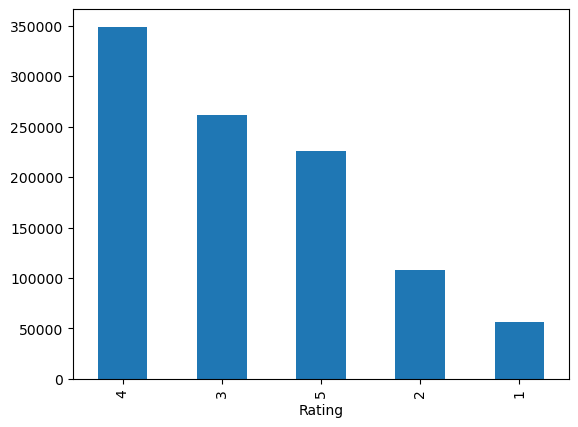

In [6]:
master_df['Rating'].value_counts().plot(kind='bar')

# **Target The Rating Age and Gender columns**

## **Rating and for all movies with Male and Female Age** 

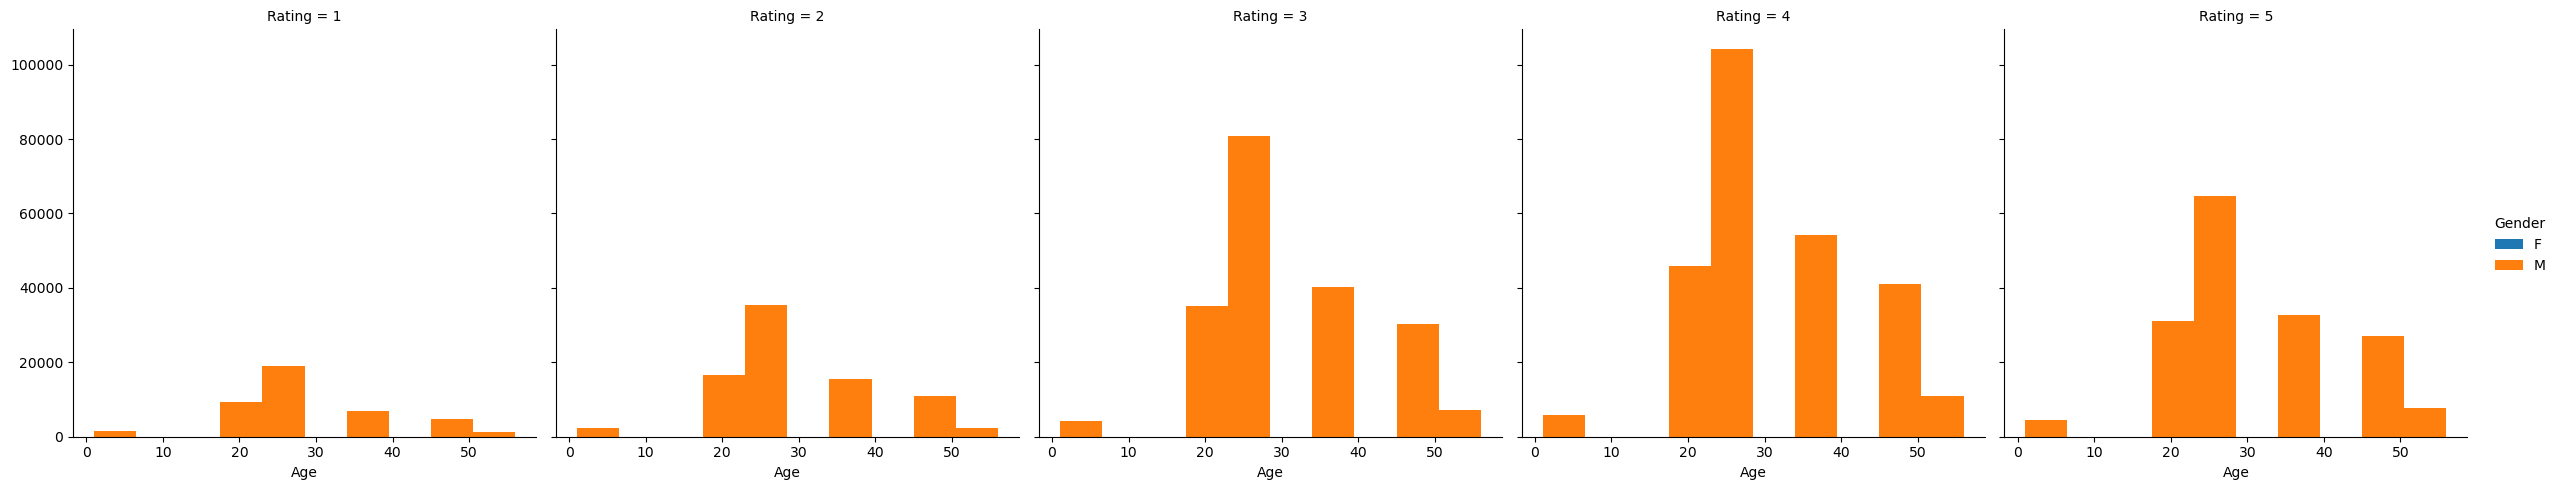

In [7]:
# create a plot rating, Age and Gender
sns.FacetGrid(master_df, hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend() 


# **create a plot rating, Age and Gender** (Male)

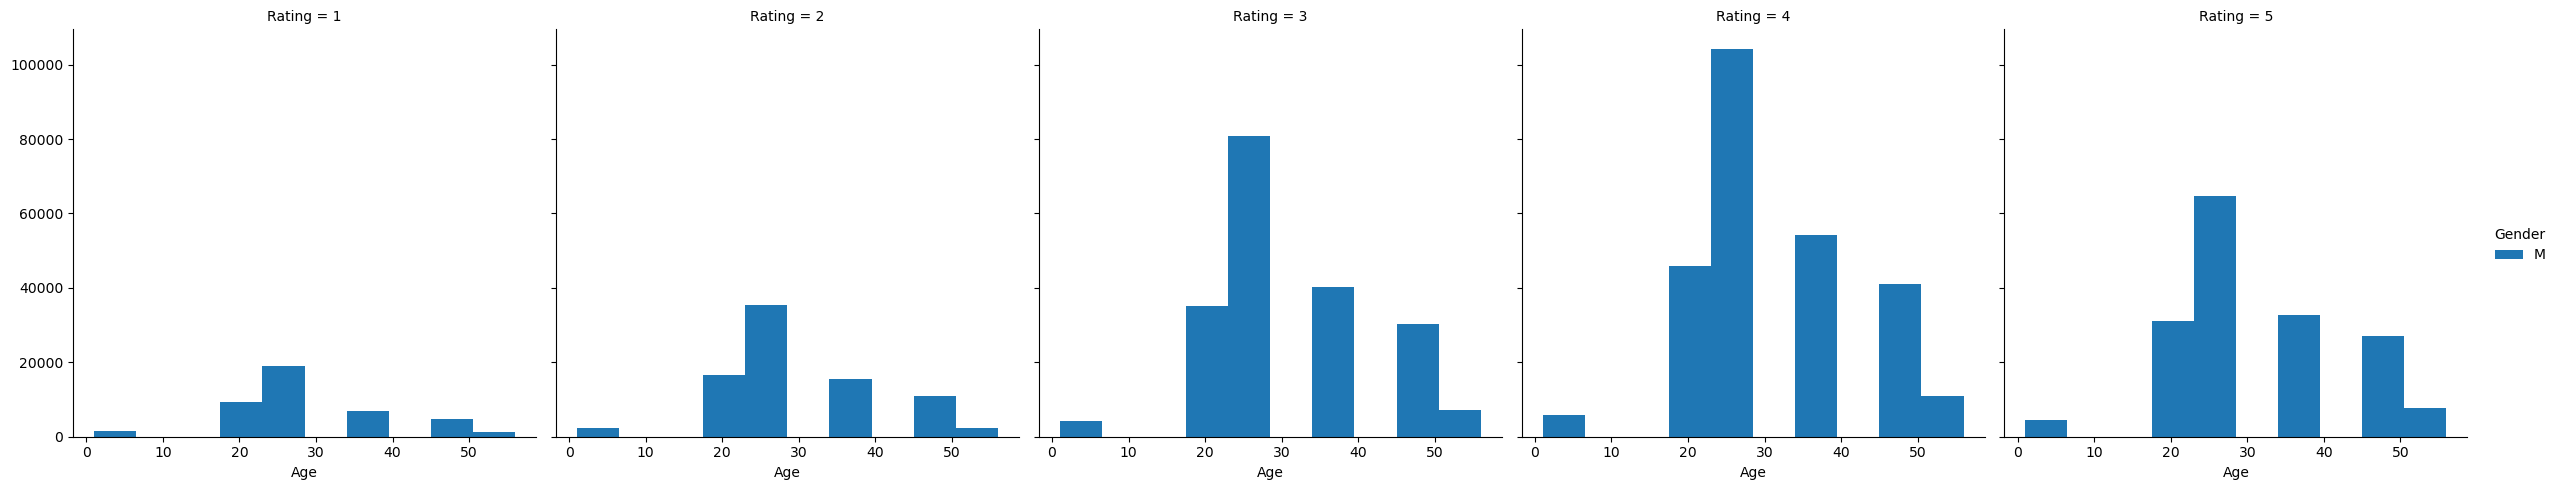

In [8]:
# create a plot rating, Age and Gender 
sns.FacetGrid(master_df[master_df['Gender'] == 'M'], hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend()
plt.show()


# **create a plot rating, Age and Gender(Female)**


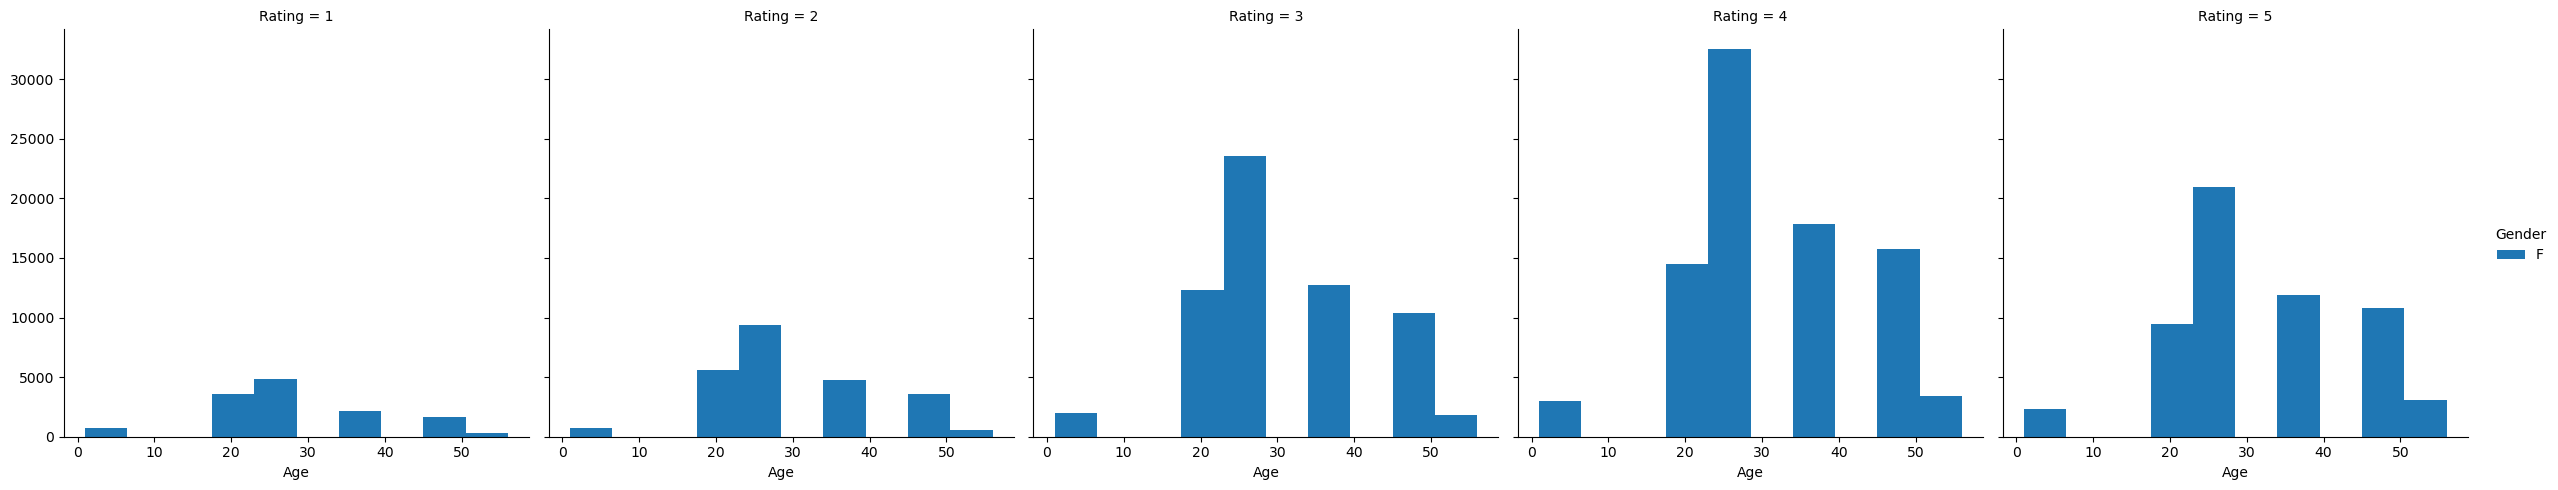

In [9]:
# create a plot rating, Age and Gender which is == F
sns.FacetGrid(master_df[master_df['Gender'] == 'F'], hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend()
plt.show()


### **Rating (4) count and mean for all movies with Male and Female Age less then 25**

In [68]:
master_df.groupby("Gender").size().sort_values(ascending=False)[:25]

Gender
M    753769
F    246440
dtype: int64

In [80]:
master_df['Age'].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

<Axes: xlabel='Age'>

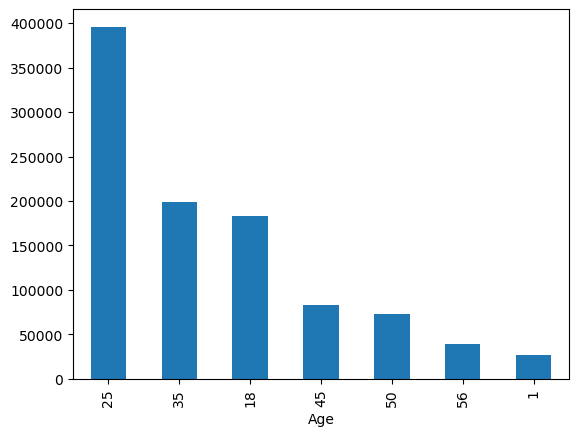

In [79]:
master_df['Age'].value_counts().plot(kind='bar')

In [10]:
master_df[master_df['Rating'] == 4]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,3408,Erin Brockovich (2000),1,1,F,10,4
8,594,Snow White and the Seven Dwarfs (1937),1,1,F,10,4
9,919,"Wizard of Oz, The (1939)",1,1,F,10,4
11,938,Gigi (1958),1,1,F,10,4
12,2398,Miracle on 34th Street (1947),1,1,F,10,4
...,...,...,...,...,...,...,...
1000196,549,Thirty-Two Short Films About Glenn Gould (1993),6040,25,M,6,4
1000201,1080,Monty Python's Life of Brian (1979),6040,25,M,6,4
1000202,1089,Reservoir Dogs (1992),6040,25,M,6,4
1000207,1096,Sophie's Choice (1982),6040,25,M,6,4


In [78]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] <25)][['Title', 'Gender']].groupby('Gender').count().sort_values(by='Title', ascending=False)

,Title
Gender,
M,51561
F,17488


In [70]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] <25)]['Title'].value_counts().sum()

205873

In [77]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] <25)]['Title'].value_counts().mean()

23.793590627153687

### **Rating (5) count and mean for all movies with Male and Female Age less then 25**

In [72]:
# all 4 rating movies list count 

master_df[master_df['Rating'] == 5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
4,2355,"Bug's Life, A (1998)",1,1,F,10,5
6,1287,Ben-Hur (1959),1,1,F,10,5
7,2804,"Christmas Story, A (1983)",1,1,F,10,5
10,595,Beauty and the Beast (1991),1,1,F,10,5
...,...,...,...,...,...,...,...
1000194,1077,Sleeper (1973),6040,25,M,6,5
1000199,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000200,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000205,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [76]:
# all 5 rating movies list and Age Lass Then 25 count with Gender
master_df[(master_df['Rating'] == 5) & (master_df['Age'] <25)][['Title', 'Gender']].groupby('Gender').count().sort_values(by='Title', ascending=False)

,Title
Gender,
M,35601
F,11759


In [75]:
master_df[(master_df['Rating'] == 5) & (master_df['Age'] < 25)]['Title'].value_counts().sum()

47360

In [17]:
master_df[(master_df['Rating'] == 5) & (master_df['Age'] <  25)]['Title'].value_counts().mean()

19.04302372336148

# Target The Title column 


In [18]:
master_df['Title'].unique()

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [19]:
master_df['Title'].nunique()

3706

In [20]:
#find out the most popular movie
print(master_df['Title'].value_counts().idxmax())

American Beauty (1999)


In [21]:
print(master_df['Title'].value_counts().idxmin())

Detroit 9000 (1973)


### MOST RATED MOVIE American Beauty (1999) check the American Beauty Rating with Gender Male and Female


In [22]:
# check the American Beauty Rating with Gender 
master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'M')][['Title', 'Rating']].groupby('Rating').count().sort_values(by='Rating', ascending=False)

,Title
Rating,
5,1434
4,664
3,246
2,88
1,50


In [23]:
master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'F')][['Title', 'Rating']].groupby('Rating').count().sort_values(by='Rating', ascending=False)

,Title
Rating,
5,529
4,226
3,112
2,46
1,33


## **Sum of American Beauty Rating with Gender == F and M**   

 American Beauty Rating with Gender == F and M  (F= 4.238901, M= 4.347301) 
This movie was released in 1999 and has a rating of 4. It was rated by both men and women. The rating is for all ages. The average rating for this movie is 4.347301 and the sum is 4.238901

In [24]:
# check the American Beauty Rating with Gender == F  and sum 
master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'F')]['Rating'].sum()


4010

In [25]:
# check the Detroit 9000 Rating with Gender 

master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'M')]['Rating'].sum()


10790

# **Detroit 9000 movie (1973)  check rating with Gender == F and M**

Detroit 9000 movie (1973)  check rating with Gender == F and M
(1973)  4.0
(1973)  5.0

Given the following data, write a query to determine the sum of the ratings for movies released in 1973 that were rated by both men and women.Gender: F = 4.0, M = 5.0Gender == F: 2.0, M = 2.0



In [26]:
# Detroit 9000 (1973)  check rating with Gender == F
master_df[(master_df['Title'] == 'Detroit 9000 (1973)') & (master_df['Gender'] == 'F')]['Rating'].sum()

0

In [27]:
master_df[(master_df['Title'] == 'Detroit 9000 (1973)') & (master_df['Gender'] == 'M')]['Rating'].sum()

2

In [37]:
master_df['Title'].value_counts().head(11)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Name: count, dtype: int64

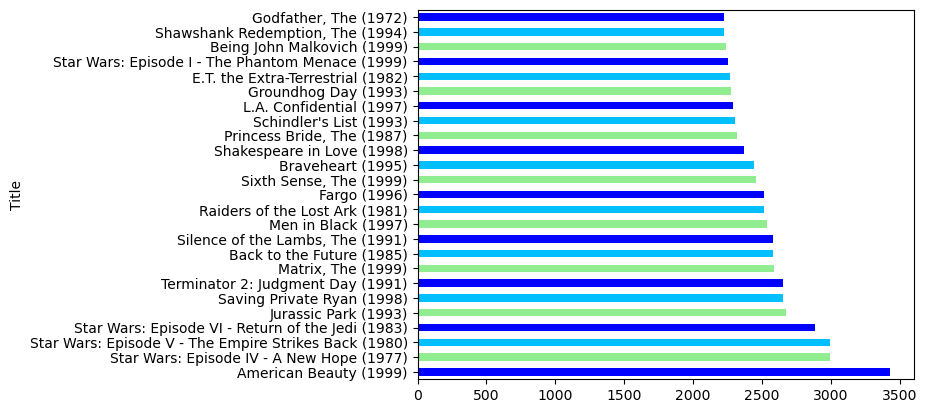

In [66]:
res = master_df.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh", color = ['blue', 'lightgreen', 'deepskyblue'])
plt.show()

# **Groupby Age** 

In [116]:
master_df['Age'].min()

1

In [88]:
master_df['Age'].max()

56

In [112]:
# create a age group column
master_df['age_group'] = pd.cut(master_df['Age'], bins=[0,1,6,11,16,21,31,41,51,56], 
                                labels=["0-1", "2-5", "6-10", "11-15", "16-20", "21-30", "31-40", "41-50", "51-55"])



In [113]:
# check the Age group with Gender == F
master_df[(master_df['Gender'] == 'F')][['Age', 'age_group']].groupby('age_group').count().sort_values(by='Age', ascending=False)

,Age
age_group,
21-30,91340
31-40,49473
16-20,45427
41-50,42174
51-55,9199
0-1,8827
2-5,0
6-10,0
11-15,0


In [114]:
master_df[(master_df['Gender'] == 'M')][['Age', 'age_group']].groupby('age_group').count().sort_values(by='Age', ascending=False)

,Age
age_group,
21-30,304216
31-40,149530
16-20,138109
41-50,113949
51-55,29581
0-1,18384
2-5,0
6-10,0
11-15,0


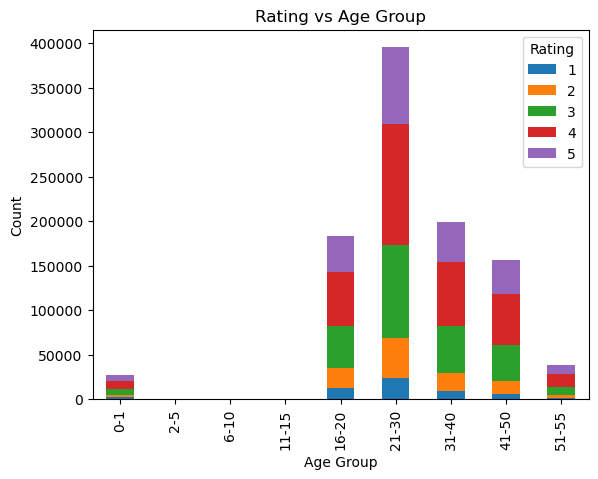

In [126]:
#check the rating and age_group with title
master_df.pivot_table(index='age_group', columns='Rating', values='Title', aggfunc='count').plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Rating vs Age Group")
plt.show()

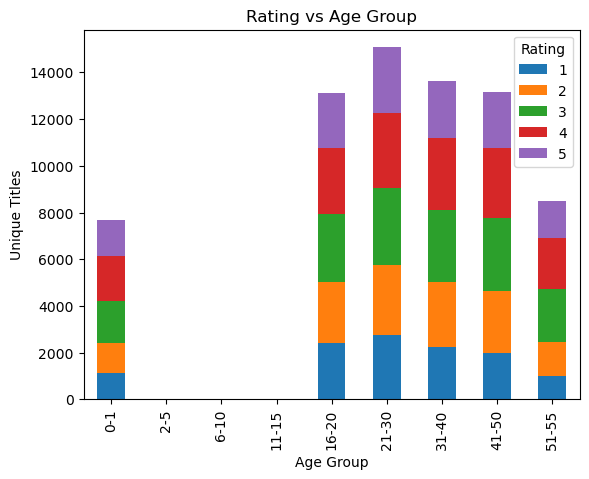

In [127]:

#check the rating and age_group with movies name 

master_df.pivot_table(index='age_group', columns='Rating', values='Title', aggfunc='nunique').plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Unique Titles")
plt.title("Rating vs Age Group")
plt.show()

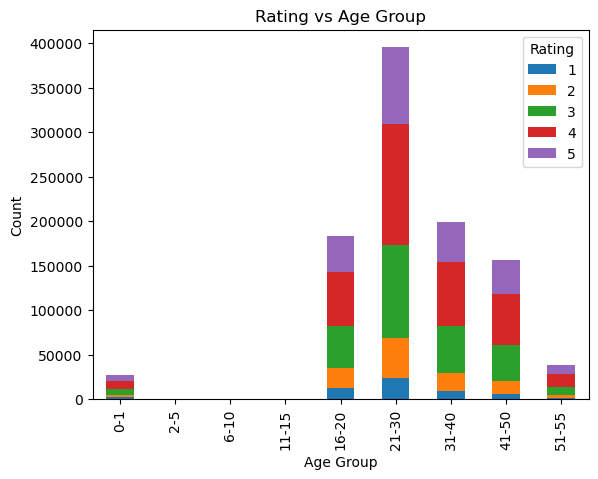

In [129]:
#check the rating and age_group with movies name
master_df.pivot_table(index='age_group', columns='Rating', values='Title', aggfunc='count').plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Rating vs Age Group")
plt.show()


In [131]:
# save file 

master_df.to_csv('./data/master_df.csv', index=False)